# Introduction


The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

## Content
1. Introduction
2. Data preparation
3. CNN
4. Training and Evaluating the model
5. Prediction and submition

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras import layers
from keras import regularizers
from keras import models
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#loading data
train=pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')

## Data preparation 

In [3]:
train_images=train.iloc[:,1:].values
train_labels=train.iloc[:,0:1].values
test_X=test.iloc[:,:].values

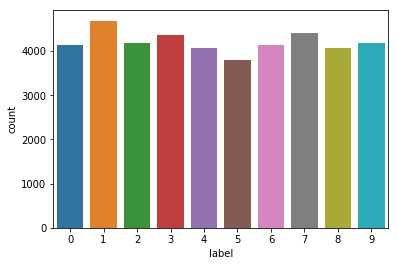

In [4]:
sns.countplot(train['label'])

In [5]:
train_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test = test.values.reshape(-1,28,28,1)
test = test / 255.0

In [7]:
train_images.shape

(42000, 28, 28, 1)

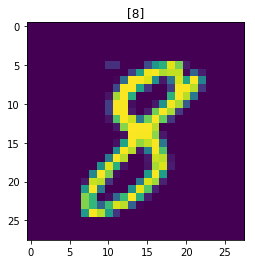

In [8]:
# Some examples
g = plt.imshow(train_images[20][:,:,0])
g=plt.title(train_labels[20])

In [9]:
train_labels = to_categorical(train_labels)

In [10]:
#using data agumenteation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(train_images)

## CNN

In [13]:
model = models.Sequential()

model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

## Training and Evaluating

In [15]:
# Fit the model
history = model.fit_generator(datagen.flow(train_images,train_labels, batch_size=64),
                              epochs = 35, 
                              verbose = 2, steps_per_epoch=train_images.shape[0] // 64
                              )

Epoch 1/35
 - 16s - loss: 0.1341 - acc: 0.9755
Epoch 2/35
 - 17s - loss: 0.1218 - acc: 0.9782
Epoch 3/35
 - 17s - loss: 0.1119 - acc: 0.9803
Epoch 4/35
 - 18s - loss: 0.1032 - acc: 0.9812
Epoch 5/35
 - 17s - loss: 0.0997 - acc: 0.9823
Epoch 6/35
 - 18s - loss: 0.0933 - acc: 0.9839
Epoch 7/35
 - 18s - loss: 0.0928 - acc: 0.9846
Epoch 8/35
 - 17s - loss: 0.0883 - acc: 0.9852
Epoch 9/35
 - 18s - loss: 0.0879 - acc: 0.9855
Epoch 10/35
 - 18s - loss: 0.0872 - acc: 0.9861
Epoch 11/35
 - 17s - loss: 0.0833 - acc: 0.9868
Epoch 12/35
 - 18s - loss: 0.0807 - acc: 0.9869
Epoch 13/35
 - 17s - loss: 0.0807 - acc: 0.9882
Epoch 14/35
 - 18s - loss: 0.0804 - acc: 0.9869
Epoch 15/35
 - 17s - loss: 0.0782 - acc: 0.9880
Epoch 16/35
 - 17s - loss: 0.0805 - acc: 0.9871
Epoch 17/35
 - 18s - loss: 0.0743 - acc: 0.9877
Epoch 18/35
 - 18s - loss: 0.0744 - acc: 0.9890
Epoch 19/35
 - 18s - loss: 0.0714 - acc: 0.9887
Epoch 20/35
 - 18s - loss: 0.0715 - acc: 0.9896
Epoch 21/35
 - 17s - loss: 0.0712 - acc: 0.9889
E

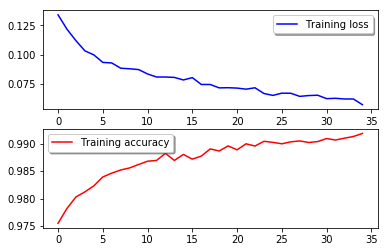

In [16]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='r', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## Prediction and Submission

In [17]:
# predict results
results = model.predict(test)

In [18]:
# select the indix with the maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [19]:
#concatinating result with series of numbers from 1 to 28000
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [20]:
model.save('digit_clfr.h5')